<a href="https://colab.research.google.com/github/gyyang/neurogym/blob/master/examples/example_neurogym_rl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NeuroGym

NeuroGym is a comprehensive toolkit that allows training any network model on many established neuroscience tasks using Reinforcement Learning techniques. It includes working memory tasks, value-based decision tasks and context-dependent perceptual categorization tasks.

In this notebook we first show how to install the relevant toolbox. 

We then show how to access the available tasks and their relevant information.

Finally we train an LSTM network on the Random Dots Motion task using the A2C algorithm [Mnih et al. 2016](https://arxiv.org/abs/1602.01783) implemented in the [stable-baselines](https://github.com/hill-a/stable-baselines) toolbox, and plot the results.

You can easily change the code to train a network on any other available task or using a different algorithm (e.g. ACER, PPO2).


### Installation
(only for running in Google Colab)

In [1]:
%tensorflow_version 1.x
# Install gym
! pip install gym
# Install neurogym
! git clone https://github.com/gyyang/neurogym.git
%cd neurogym/
! pip install -e .
# Install stable-baselines
! pip install --upgrade stable-baselines

Cloning into 'neurogym'...
remote: Enumerating objects: 426, done.
remote: Counting objects: 100% (426/426), done.
remote: Compressing objects: 100% (253/253), done.
remote: Total 7264 (delta 302), reused 270 (delta 171), pack-reused 6838
Receiving objects: 100% (7264/7264), 6.51 MiB | 16.39 MiB/s, done.
Resolving deltas: 100% (5297/5297), done.
/content/neurogym
Obtaining file:///content/neurogym
  Running setup.py develop for neurogym
     |████████████████████████████████| 235kB 27.9MB/s 
  Found existing installation: stable-baselines 2.2.1
    Uninstalling stable-baselines-2.2.1:
      Successfully uninstalled stable-baselines-2.2.1


### Make a task

### PerceptualDecisionMaking
Doc: 
        Two-alternative forced choice task in which the subject has to
        integrate two stimuli to decide which one is higher on average.

        Parameters:
        dt: Timestep duration. (def: 100 (ms), int)
        rewards:
            R_ABORTED: given when breaking fixation. (def: -0.1, float)
            R_CORRECT: given when correct. (def: +1., float)
            R_FAIL: given when incorrect. (def: 0., float)
        timing: Description and duration of periods forming a trial.
        stim_scale: Controls the difficulty of the experiment. (def: 1., float)
        
Reference paper 
[The analysis of visual motion: a comparison of neuronal and psychophysical performance](https://www.jneurosci.org/content/12/12/4745)

Default Period timing (ms) 
fixation : constant 100
stimulus : constant 2000
decision : constant 100

Tags: perceptual, two-alternative, supervised.



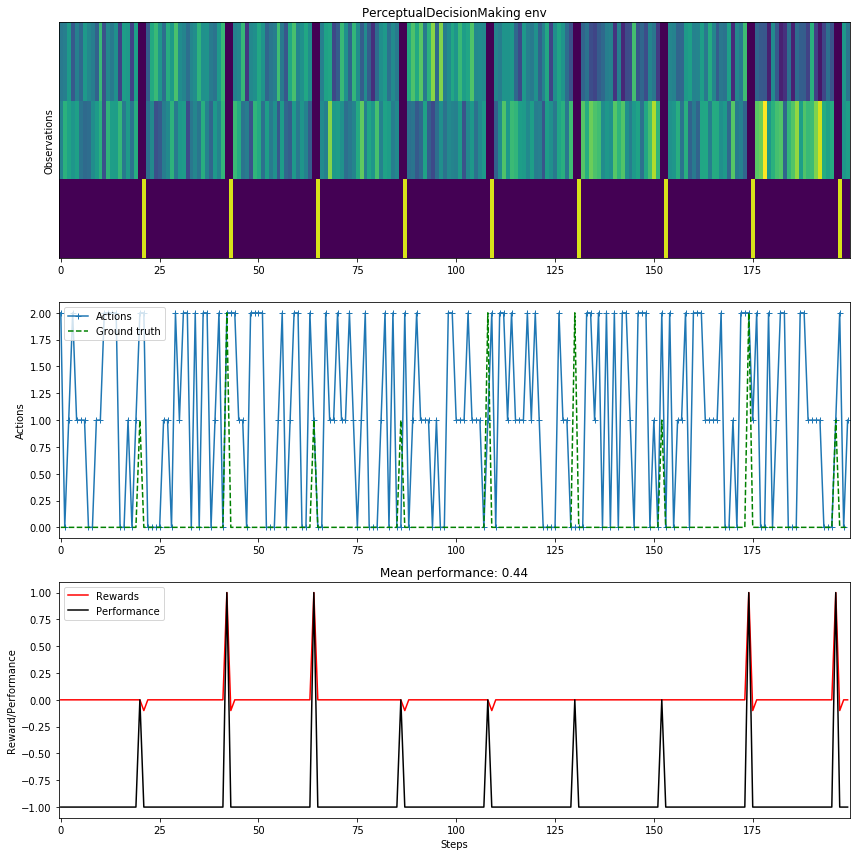

In [2]:
import gym
import neurogym as ngym
import warnings
warnings.filterwarnings('ignore')

name = 'PerceptualDecisionMaking-v0'
timing = {'fixation': ('constant', 200),
          'stimulus': ('constant', 500),
          'decision': ('constant', 200)}
kwargs = {'dt': 100, 'timing': timing}
env = gym.make(name, **kwargs)
print(env)
data = ngym.utils.plot_env('PerceptualDecisionMaking-v0', fig_kwargs={'figsize': (12, 12)})

### Train a network

In [3]:
import warnings
from neurogym.wrappers import trial_hist
from stable_baselines.common.policies import LstmPolicy
from stable_baselines.common.vec_env import DummyVecEnv
from stable_baselines import A2C  # ACER, PPO2
warnings.filterwarnings('default')

env = gym.make(name, **kwargs)
# Apply the wrapper
env = trial_hist.TrialHistory(env, rep_prob=(.1, .9), block_dur=50)

# Optional: PPO2 requires a vectorized environment to run
# the env is now wrapped automatically when passing it to the constructor
env = DummyVecEnv([lambda: env])

model = A2C(LstmPolicy, env, verbose=1, policy_kwargs={'feature_extraction':"mlp"})
model.learn(total_timesteps=10000, log_interval=1000)
env.close()

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.





/usr/local/lib/python3.6/dist-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))




Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Please use `layer.__call__` method instead.






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


---------------------------------
| explained_variance | 0.0918   |
| fps                | 2        |
| nupdates           | 1        |
| policy_entropy     | 1.1      |
| total_timesteps    | 5        |
| value_loss         | 0.00169  |
---------------------------------
---------------------------------
| explained_variance | 0.376    |
| fps                | 288      |
| nupdates           | 1000     |
| policy_entropy     | 1.1      |
| total_timesteps    | 5000     |
| value_loss         | 0.283    |
---------------------------------
---------------------------------
| explained_variance | 0.717    |
| fps                | 306      |

# Visualize results

/usr/local/lib/python3.6/dist-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


AttributeError: ignored

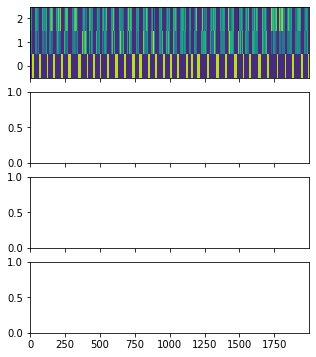

In [5]:
# Create task
env = gym.make(name, **kwargs)
# Apply the wrapper
env = trial_hist.TrialHistory(env, rep_prob=(.1, .9), block_dur=50)
env = DummyVecEnv([lambda: env])
data = ngym.utils.plot_env(env, num_steps_env=2000, model=model)